# Week 9 Lab Assignment: Implementing Clustering Techniques

### Objective
In this lab, you will explore different clustering techniques, including K-Means, Hierarchical Clustering, and DBSCAN. You will learn to apply these techniques using Python, visualize the results, and interpret the clusters to draw meaningful insights.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: Scikit-learn, Pandas, Numpy, Matplotlib, and Scipy.

In [1]:
# Install necessary packages
%pip install scikit-learn pandas numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, clustering, and visualization.


In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
%matplotlib inline

### 3. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for clustering.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [3]:
# Load the dataset
df = pd.read_csv('clustering_data_A.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

   CustomerID  Age  Annual_Income  Spending_Score
0           1   19          15000              39
1           2   21          18000              81
2           3   20          25000               6
3           4   23          30000              77
4           5   31          40000              40
CustomerID        0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64
       CustomerID        Age  Annual_Income  Spending_Score
count    50.00000  50.000000      50.000000       50.000000
mean     25.50000  36.580000   52000.000000       55.540000
std      14.57738  12.684701   20437.061173       28.429081
min       1.00000  19.000000   12000.000000        3.000000
25%      13.25000  26.250000   40000.000000       36.000000
50%      25.50000  35.000000   52000.000000       60.000000
75%      37.75000  45.750000   69500.000000       79.250000
max      50.00000  67.000000   85000.000000       99.000000


### 4. Data Preparation
**Objective:** Prepare the data for clustering by normalizing features.

**Tasks:**
1. **Normalize Features:** Scale features to have zero mean and unit variance.

In [4]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.values
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-1.69774938 -1.39999217 -1.82881696 -0.58770535]
 [-1.62845348 -1.24072116 -1.68053451  0.90465406]
 [-1.55915759 -1.32035667 -1.33454211 -1.76027346]
 [-1.4898617  -1.08145015 -1.08740468  0.7625246 ]
 [-1.4205658  -0.44436612 -0.59312983 -0.55217298]]


### 5. Implement K-Means Clustering
**Objective:** Apply K-Means clustering on the dataset and determine the optimal number of clusters.

**Tasks:**
1. **Apply K-Means Clustering:** Use the K-Means algorithm to partition the data into clusters.
2. **Determine Optimal Clusters:** Use the elbow method to identify the best number of clusters.

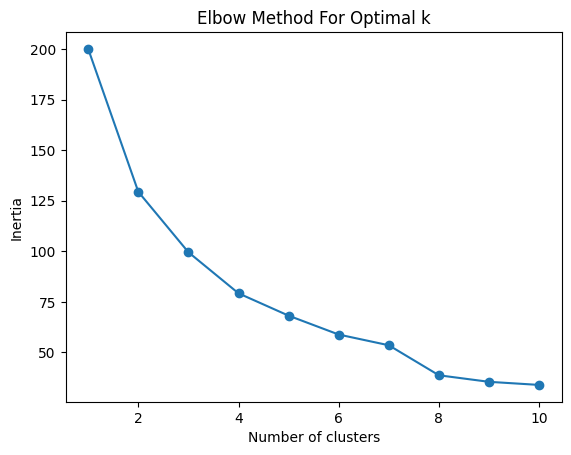

In [5]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### 6. Implement Hierarchical Clustering
**Objective:** Perform hierarchical clustering and visualize the dendrogram.

**Tasks:**
1. **Perform Hierarchical Clustering:** Use the linkage method to compute the hierarchical clustering.
2. **Visualize Dendrogram:** Plot a dendrogram to visualize the hierarchy of clusters.

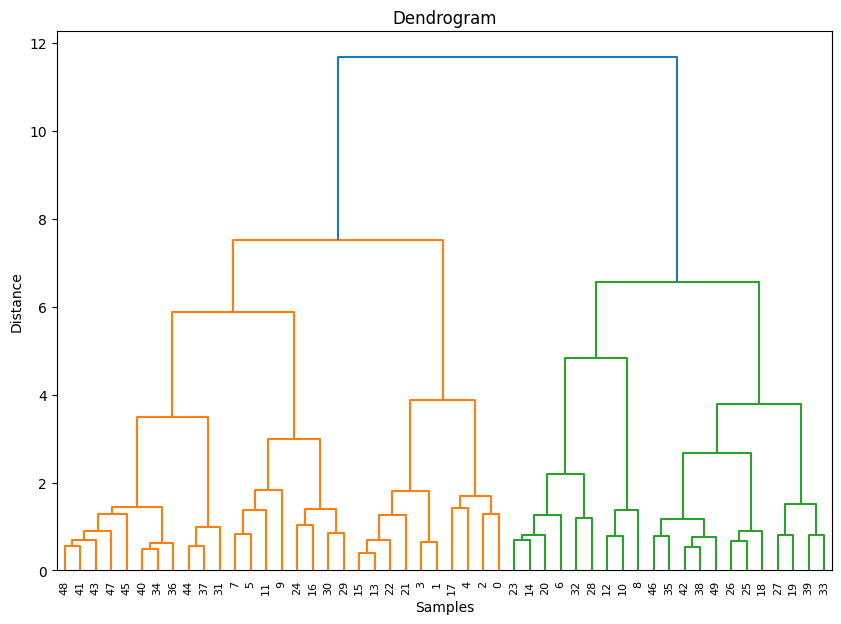

In [6]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### 7. Implement DBSCAN
**Objective:** Apply DBSCAN clustering to identify dense regions and outliers.

**Tasks:**
1. **Apply DBSCAN:** Use the DBSCAN algorithm to find clusters based on density.
2. **Visualize Clusters:** Plot the clusters identified by DBSCAN.

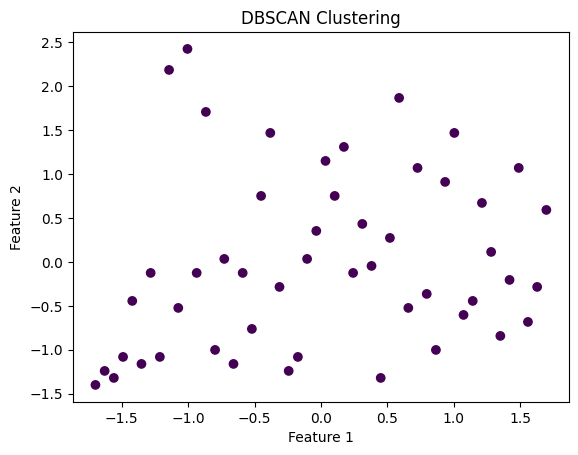

In [7]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_



# Visualize DBSCAN clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 8. Evaluate Clustering Results
**Objective:** Use silhouette score to evaluate the quality of clusters formed by different algorithms.

**Tasks:**
1. **Compute Silhouette Score:** Calculate the silhouette score for each clustering result.

In [8]:
# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(X_scaled, labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Evaluate DBSCAN clustering
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(X_scaled):
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print('DBSCAN did not find enough clusters to calculate a silhouette score.')


K-Means Silhouette Score: 0.27649324411213705
DBSCAN did not find enough clusters to calculate a silhouette score.


### 9. Summary and Discussion
**Objective:** Reflect on the effectiveness of different clustering techniques and discuss how they can be applied to business problems.

**Tasks:**
1. **Compare Clustering Techniques:** Discuss the advantages and disadvantages of K-Means, Hierarchical Clustering, and DBSCAN.
2. **Business Implications:** Describe how the results of clustering can be used to make informed business decisions.

### 10. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, visualizations, and clustering evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing the performance of different clustering techniques, and discussing their business implications.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.